# Kuzushiji Classification with Support Vector Machines

In this notebook we are going to explore the use of Support Vector Machines (SVM) for image classification. We will use a variant of the famous MNIST dataset (the original is a dataset of handwritten digits). The version we are going to use is called Kuzushiji-MNIST or K-MNIST for short (https://github.com/rois-codh/kmnist) and is a dataset of traditional japanese handwritten kana.



The dataset labels are the following:

| Label | Hiragana Character | Romanji (Pronunciation) |
| :-: | :-: | :-: |
|   0   | お | o |
| 1 | き | ki |
| 2 | す | su |
| 3 | つ | tsu |
| 4 | な | na |
| 5 | は | ha |
| 6 | ま | ma |
| 7 | や | ya |
| 8 | れ | re |
| 9 | を | wo |

## TODO: Insert your surname, name and ID number

Student surname:Tao

Student name:Menglu
    
ID:2041389

In [1]:
#load the required packages

%matplotlib inline  

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

import sklearn
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
import sklearn.metrics as skm

In [2]:
# helper function to load Kuzushiji-MNIST dataset
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np
    labels_path = os.path.join(path, 'K%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, 'K%s-images-idx3-ubyte.gz' % kind)
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,offset=8)
    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,offset=16).reshape(len(labels), 784)
    return images, labels

In [3]:
#fix your ID ("numero di matricola") and the seed for random generator (as usual you can try different seeds)
ID = 2041389 # place a random seed
np.random.seed(ID)

In [4]:
#load the K-MNIST dataset from the 'data' folder and let's normalize the features so that each value is in [0,1] 

X, y = load_mnist('data', kind='train')
# rescale the data
X, y = X / 255., y # original pixel values are between 0 and 255
print(X.shape, y.shape)

(60000, 784) (60000,)


Now split into training and test. Make sure that each label is present at least 10 times
in training. If it is not, then keep adding permutations to the initial data until this 
happens.

In [5]:
# Random permute the data and split into training and test taking the first 600
# data samples as training and 4000 samples as test
permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

m_training = 600
m_test = 4000

X_train, X_test = X[:m_training], X[m_training:m_training+m_test:]
y_train, y_test = y[:m_training], y[m_training:m_training+m_test:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)


Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [50 52 56 66 56 49 58 65 77 71]


In [6]:
#function for plotting a image and printing the corresponding label
def plot_input(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print("LABEL: %i"%labels[index])
    return

INPUT:


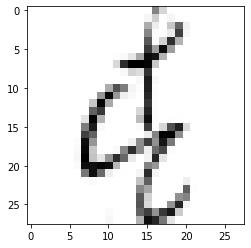

LABEL: 2
INPUT:


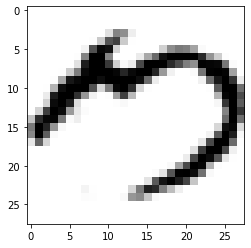

LABEL: 3
INPUT:


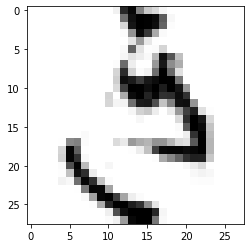

LABEL: 1
INPUT:


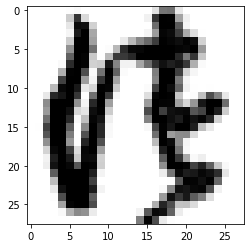

LABEL: 3


In [7]:
#let's try the plotting function
plot_input(X_train,y_train,5)
plot_input(X_test,y_test,50)
plot_input(X_test,y_test,500)
plot_input(X_test,y_test,700)

## TO DO 1
Use a SVM classifier with cross validation to pick a model. Use a 4-fold cross-validation. Let's start with a Linear kernel:

In [8]:
#import SVC
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
import pandas as pd

#import for Cross-Validation
from sklearn.model_selection import GridSearchCV

#import for evaluating accuracy
from sklearn import metrics

# parameters for linear SVM
parameters = {'C': [0.01, 0.1, 1, 10]}


#create a svm classifier
clf = SVC(kernel = 'linear') #Linear Kernel

# 4-fold cross validation 
grid_search = GridSearchCV(clf, parameters, cv=4)
grid_search.fit(X_train, y_train)

#train linear SVM
clf.fit(X_train,y_train)

#predict the response for test dataset
y_pred = clf.predict(X_test)

#evaluate the accuracy 
print ('RESULTS FOR LINEAR KERNEL')
print('Accuracy: ', skm.accuracy_score(y_test,y_pred))

#best parameters set
print("Best parameters set found:")
print(grid_search.best_params_)


#score with best parameters
print("Score with best parameters:")
print(grid_search.best_score_)


#all scores on the grid
print("All scores on the grid:")
pd.concat([pd.DataFrame(grid_search.cv_results_["params"]),pd.DataFrame(grid_search.cv_results_["mean_test_score"], columns=["Scores"])],axis=1)


RESULTS FOR LINEAR KERNEL
Accuracy:  0.75025
Best parameters set found:
{'C': 0.01}
Score with best parameters:
0.75
All scores on the grid:


,C,Scores
0,0.01,0.750000
1,0.10,0.741667
2,1.00,0.738333
3,10.00,0.738333


## TO DO 2
Pick a model for the Polynomial kernel with degree=2:

In [9]:
# parameters for poly with degree 2 kernel
parameters = {'C': [0.01, 0.1, 1],'gamma':[0.01,0.1,1]}

#run SVM with poly of degree 2 kernel

clf_poly = SVC(kernel = 'poly',degree=2)

# 4-fold cross validation 
grid_search = GridSearchCV(clf_poly, parameters, cv=4)
grid_search.fit(X_train, y_train)

#train linear SVM
clf_poly.fit(X_train,y_train)

#predict the response for test dataset
y_pred = clf_poly.predict(X_test)

#evaluate the accuracy 
print ('RESULTS FOR POLY DEGREE=2 KERNEL')
print('Accuracy: ', skm.accuracy_score(y_test,y_pred))

#best parameters set
print("Best parameters set found:")
print(grid_search.best_params_)

#score with best parameters
print("Score with best parameters:")
print(grid_search.best_score_)

print("\nAll scores on the grid:")
pd.concat([pd.DataFrame(grid_search.cv_results_["params"]),pd.DataFrame(grid_search.cv_results_["mean_test_score"], columns=["Scores"])],axis=1)

RESULTS FOR POLY DEGREE=2 KERNEL
Accuracy:  0.80375
Best parameters set found:
{'C': 0.01, 'gamma': 0.1}
Score with best parameters:
0.7533333333333333

All scores on the grid:


,C,gamma,Scores
0,0.01,0.01,0.128333
1,0.01,0.10,0.753333
2,0.01,1.00,0.751667
3,0.10,0.01,0.388333
4,0.10,0.10,0.753333
5,0.10,1.00,0.751667
6,1.00,0.01,0.753333
7,1.00,0.10,0.751667
8,1.00,1.00,0.751667


## TO DO 3

Now let's try a higher degree for the polynomial kernel (e.g., 3rd degree).

In [10]:
# parameters for poly with higher degree kernel
parameters = {'C': [0.01, 0.1, 1],'gamma':[0.01,0.1,1]}

#run SVM with poly of higher degree kernel
degree = 3
clf_poly_3 = SVC(kernel = 'poly',degree=3)

# 4-fold cross validation 
grid_search = GridSearchCV(clf_poly_3, parameters, cv=4)
grid_search.fit(X_train, y_train)

#train linear SVM
clf_poly_3.fit(X_train,y_train)

#predict the response for test dataset
y_pred = clf_poly_3.predict(X_test)

#evaluate the accuracy 
print ('RESULTS FOR POLY DEGREE=', degree, ' KERNEL')
print('Accuracy: ', skm.accuracy_score(y_test,y_pred))

#best parameters set
print("Best parameters set found:")
print(grid_search.best_params_)

#score with best parameters
print("Score with best parameters:")
print(grid_search.best_score_)

print("\nAll scores on the grid:")
pd.concat([pd.DataFrame(grid_search.cv_results_["params"]),pd.DataFrame(grid_search.cv_results_["mean_test_score"], columns=["Scores"])],axis=1)

RESULTS FOR POLY DEGREE= 3  KERNEL
Accuracy:  0.76
Best parameters set found:
{'C': 0.01, 'gamma': 0.1}
Score with best parameters:
0.7200000000000001

All scores on the grid:


,C,gamma,Scores
0,0.01,0.01,0.128333
1,0.01,0.10,0.720000
2,0.01,1.00,0.675000
3,0.10,0.01,0.306667
4,0.10,0.10,0.675000
5,0.10,1.00,0.675000
6,1.00,0.01,0.688333
7,1.00,0.10,0.675000
8,1.00,1.00,0.675000


## TO DO 4
Pick a model for the Radial Basis Function kernel:

In [11]:
# parameters for rbf SVM
parameters = {'C': [0.1, 1, 10, 100],'gamma':[0.001, 0.01, 0.1,1]}

#run SVM with rbf kernel
clf_rbf = SVC(kernel='rbf')

# 4-fold cross validation 
grid_search = GridSearchCV(clf_rbf, parameters, cv=4)
grid_search.fit(X_train, y_train)

#train linear SVM
clf_rbf.fit(X_train,y_train)

#predict the response for test dataset
y_pred = clf_rbf.predict(X_test)

#evaluate the accuracy 
print ('RESULTS FOR FOR rbf KERNEL')
print('Accuracy: ', skm.accuracy_score(y_test,y_pred))

#best parameters set
print("Best parameters set found:")
print(grid_search.best_params_)

#score with best parameters
print("Score with best parameters:")
print(grid_search.best_score_)

print("\nAll scores on the grid:")
pd.concat([pd.DataFrame(grid_search.cv_results_["params"]),pd.DataFrame(grid_search.cv_results_["mean_test_score"], columns=["Scores"])],axis=1)

RESULTS FOR FOR rbf KERNEL
Accuracy:  0.804
Best parameters set found:
{'C': 10, 'gamma': 0.01}
Score with best parameters:
0.8166666666666667

All scores on the grid:


,C,gamma,Scores
0,0.1,0.001,0.128333
1,0.1,0.010,0.156667
2,0.1,0.100,0.128333
3,0.1,1.000,0.128333
4,1.0,0.001,0.595000
5,1.0,0.010,0.790000
6,1.0,0.100,0.131667
7,1.0,1.000,0.128333
8,10.0,0.001,0.765000
9,10.0,0.010,0.816667


## QUESTION 1
What do you observe when using linear, polynomial and RBF kernels on this dataset ?

Answer: 
When using RBF kernels, the accuracy is the best. Second best is when using polynomial as kernel.

## TO DO 5
Report here the best SVM kernel and parameters

In [12]:
#get training and test error for the best SVM model from CV

best_SVM = {'C': 10, 'gamma': 0.01} # USE YOUR OPTIMAL PARAMETERS

training_error =  1- clf_rbf.fit(X_train,y_train).score(X_train, y_train)

test_error =  1 - clf_rbf.fit(X_test,y_test).score(X_test, y_test)
# (error is 1 - svm.score)

print ("Best SVM training error: %f" % training_error)
print ("Best SVM test error: %f" % test_error)

Best SVM training error: 0.016667
Best SVM test error: 0.023250


## TO DO 6

Analyze how the gamma parameter (inversely proportional to standard deviation of Gaussian Kernel) impact the performances of the classifier

In [13]:
#Test with different values of gamma

# Set gamma values
# np.logspace() Return numbers spaced evenly on a log scale. index range [-5,2]
gamma_values = np.logspace(-5,2,8) 
print(gamma_values)


[1.e-05 1.e-04 1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02]


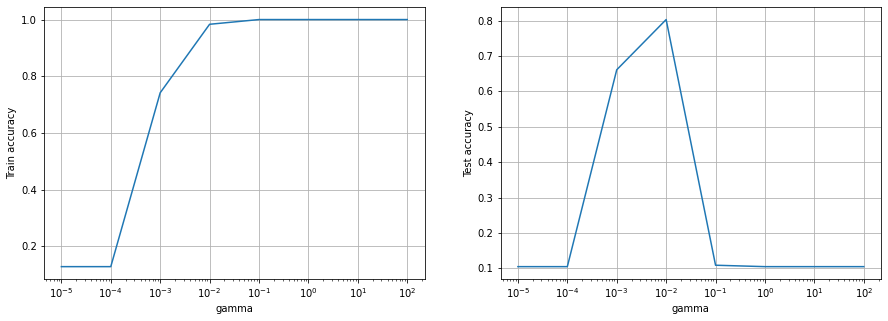

In [14]:
# Try the SVM with the previously set values of gamma
# use rbf kernel and C=1

# parameters for rbf SVM
#parameters = {'C':np.array([1]),'gamma':[1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]}


train_acc_list, test_acc_list = [], []
    
for i in gamma_values:
    model_train = SVC(kernel='rbf', C=np.array([1]), gamma= i)
    model_train.fit(X_train, y_train)
    
    #predict the response for train & test dataset
    y_pred_train = model_train.predict(X_train)
    y_pred_test = model_train.predict(X_test)
    
    # append the accuracy for train & test dataset
    train_acc_list.append(metrics.accuracy_score(y_pred_train, y_train))
    test_acc_list.append(metrics.accuracy_score(y_pred_test, y_test))


# ADD YOUR CODE TO TRAIN THE SVM MULTIPLE TIMES WITH THE DIFFERENT VALUES OF GAMMA
# PLACE THE TRAIN AND TEST ACCURACY FOR EACH TEST IN THE TRAIN AND TEST ACCURACY LISTS

# Plot
fig, ax = plt.subplots(1,2, figsize=(15,5))

ax[0].plot(gamma_values, train_acc_list)
ax[0].set_xscale('log')
ax[0].set_xlabel('gamma')
ax[0].set_ylabel('Train accuracy')
ax[0].grid(True)

ax[1].plot(gamma_values, test_acc_list)
ax[1].set_xscale('log')
ax[1].set_xlabel('gamma')
ax[1].set_ylabel('Test accuracy')
ax[1].grid(True)


plt.show()

## QUESTION 2
How do the train and test error change when changing gamma ? Which is the best value of gamma ? 
Connect your answers to the discussion about the overfitting issue.

Answer: When the gamma becomes bigger, train error becomes smaller, test error becomes smaller firstly then becomes bigger. Best value of gamma is 1.e-02. The reason why this happens is because: the higher the gamma value, it tries to exactly fit the training data set, also the data set is small, thus cause overfitting in test dataset

## More data
Now let's do the same but using more data points for training.


Choose a new number of data points.

In [15]:
X = X[permutation]
y = y[permutation]

m_training = 2000 # TODO number of data points, adjust depending on the capabilities of your PC

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [197 202 211 204 201 196 182 203 193 211]


## TO DO 7

Let's try to use SVM with parameters obtained from the best model for $m_{training} =  2000$. Since it may take a long time to run, you can decide to just let it run for some time and stop it if it does not complete. If you decide to do this, report it in the cell below.

In [16]:
#get training and test error for the best SVM model from CV

# parameters for rbf SVM
parameters = {'C': np.array([10]),'gamma':np.array([0.01])}

clf_best = SVC(kernel='rbf')

# 4-fold cross validation 
grid_search = GridSearchCV(clf_best, parameters, cv=4)
grid_search.fit(X_train, y_train)


training_error =  1- clf_best.fit(X_train,y_train).score(X_train, y_train)
test_error =  1 - clf_best.fit(X_test,y_test).score(X_test, y_test)

print ("Best SVM training error: %f" % training_error)
print ("Best SVM test error: %f" % test_error)

Best SVM training error: 0.015000
Best SVM test error: 0.013448


Just for comparison, let's also use logistic regression 

## TO DO 8 Try first without regularization (use a very large large C)¶

In [17]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
# ADD YOUR CODE
#create a logistic regression classifer
logreg = LogisticRegression(solver='lbfgs', max_iter=1000,C=1000.0)

training_error = 1 - logreg.fit(X_train,y_train).score(X_train,y_train)
test_error = 1 - logreg.fit(X_train,y_train).score(X_test,y_test)


print ("Best logistic regression training error: %f" % training_error)
print ("Best logistic regression test error: %f" % test_error)

Best logistic regression training error: 0.000000
Best logistic regression test error: 0.278121


## TO DO 9 Try  with regularization (use C=1)¶

In [18]:
# ADD YOUR CODE
logreg = LogisticRegression(solver='lbfgs', max_iter=1000,C=1.0)

training_error = 1 - logreg.fit(X_train,y_train).score(X_train,y_train)
test_error = 1 - logreg.fit(X_train,y_train).score(X_test,y_test)


print ("Best logistic regression training error: %f" % training_error)
print ("Best logistic regression test error: %f" % test_error)

Best logistic regression training error: 0.000500
Best logistic regression test error: 0.255862


## QUESTION 3
Compare and discuss:
- the results from SVM with m=600 and with m=2000 training data points. If you stopped the SVM, include such aspect in your comparison.
- the results of SVM and of Logistic Regression


Answer:
- Results from SVM with m=2000 training data points have better perfomance in accurary.
- Results of SVM have better accuracy than that of Logistic Regression.

## TO DO 10
Plot an item of character that is missclassified by logistic regression and correctly classified by SVM.

[6 1 3 ... 5 1 1]
[6 1 3 ... 3 1 1]
INPUT:


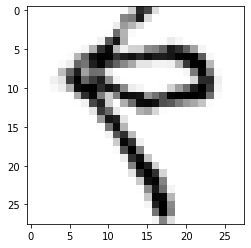

LABEL: 7


In [19]:
LR_prediction = logreg.predict(X_test) 
SVM_prediction = clf_best.predict(X_test) 

print(LR_prediction)
print(SVM_prediction)

num_itens = len(X_test)
for i in range(num_itens):
    if LR_prediction[i]!= SVM_prediction[i] and SVM_prediction[i] == y_test[i]:
        plot_input(X_test,y_test,i)
        break


## TO DO 11
Plot the confusion matrix for the SVM classifier and for logistic regression.
The confusion matrix has one column for each predicted label and one row for each true label. 
It shows for each class in the corresponding row how many samples belonging to that class gets each possible output label.
Notice that the diagonal contains the correctly classified samples, while the other cells correspond to errors.
You can obtain it with the sklearn.metrics.confusion_matrix function (see the documentation).
Try also to normalize the confusion matrix by the number of samples in each class in order to measure the accuracy on each single class.


In [20]:
from sklearn.metrics import confusion_matrix
np.set_printoptions(precision=2, suppress=True) # for better aligned printing of confusion matrix use floatmode='fixed'

u, counts = np.unique(y_test, return_counts=True)
print("Labels and frequencies in test set: ", counts)

confusion_SVM = confusion_matrix(y_test,SVM_prediction)
print("\n Confusion matrix SVM  \n \n", confusion_SVM)
print("\n Confusion matrix SVM (normalized)   \n \n", confusion_SVM /counts[:,None] )

confusion_LR =  confusion_matrix(y_test,LR_prediction)
print("\n Confusion matrix LR  \n \n", confusion_LR)
print("\n Confusion matrix LR (normalized)   \n \n", confusion_LR /counts[:,None] )

Labels and frequencies in test set:  [5803 5798 5789 5796 5799 5804 5818 5797 5807 5789]

 Confusion matrix SVM  
 
 [[5763    2    1    0   13    3    3   12    5    1]
 [   3 5720    5    4   16    2   37    0    6    5]
 [   0   11 5644    6   13    5   83    2   21    4]
 [   2    3    7 5754    5    5    4    4   10    2]
 [  11   13   18    1 5701    5   24    1   25    0]
 [   6   12   37   31   11 5682   13    4    6    2]
 [   1   10   36    2   14    4 5746    2    2    1]
 [   5    6    5    5    8    1    4 5750    9    4]
 [   4   17    9    1    2    0   28    2 5741    3]
 [   5   19   19    2   13    3    4    2    3 5719]]

 Confusion matrix SVM (normalized)   
 
 [[0.99 0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.99 0.   0.   0.   0.   0.01 0.   0.   0.  ]
 [0.   0.   0.97 0.   0.   0.   0.01 0.   0.   0.  ]
 [0.   0.   0.   0.99 0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.98 0.   0.   0.   0.   0.  ]
 [0.   0.   0.01 0.01 0.   0.98 0.   0.   0. 

In [21]:
# ADD CODE TO NORMALIZE CONFUSION MATRIX AND PRINT THE NORMALIZED MATRIX


## QUESTION 4
Have a look at the confusion matrices and comment on the obtained accuracies. Why some classes have lower accuracies and others an higher one ? Make some guesses on the possible causes.

Answer:
Because some classes can be easily misclassified due to high complexity. For example な and を.
